                                                   Churn Modelling

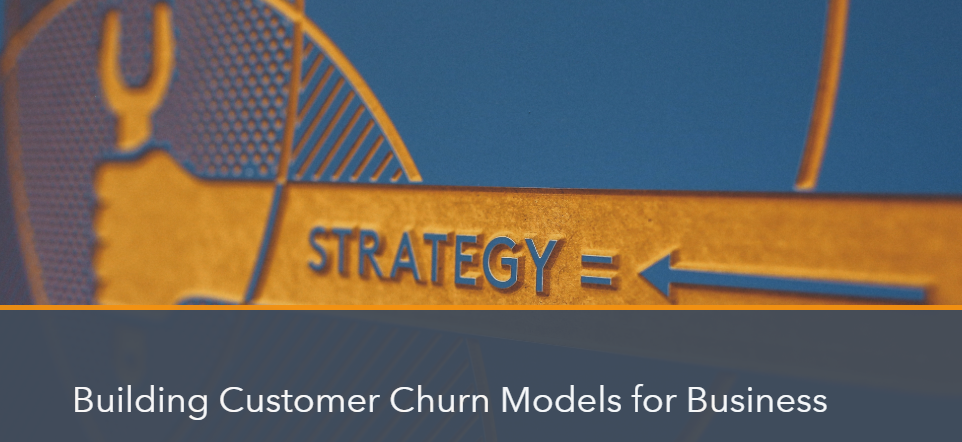

In [5]:
from IPython.display import Image
Image(filename='Churn_Modelling.PNG')

It is no secret that customer retention is a top priority for many companies; acquiring new customers can be several times more expensive than retaining existing ones. Furthermore, gaining an understanding of the reasons customers churn and estimating the risk associated with individual customers are both powerful components of designing a data-driven retention strategy. A churn model can be the tool that brings these elements together and provides insights and outputs that drive decision making across an organization. 

In [2]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

import os
os.getcwd()
os.chdir('C:/Users/Abin/Desktop/')

import pandas as pd
import numpy as np

C:\Users\Abin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [20]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
x.iloc[:, 1] = labelencoder_X_1.fit_transform(x.iloc[:, 1])
labelencoder_X_2 = LabelEncoder()
x.iloc[:, 2] = labelencoder_X_2.fit_transform(x.iloc[:, 2])

In [25]:
onehotencoder = OneHotEncoder(categorical_features = [1])
x = onehotencoder.fit_transform(x).toarray()
x

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y, test_size = 0.2)

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

In [28]:
#Initializing Neural Network
m1 = Sequential()

In [29]:
# Adding the input layer and the first hidden layer
m1.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 12))

C:\Users\Abin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=12, units=6, kernel_initializer="uniform")`
  


In [30]:
# Adding the second hidden layer
m1.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

C:\Users\Abin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  


In [31]:
m1.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

C:\Users\Abin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [32]:
m1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
# Fitting our model 
m1.fit(train_x, train_y, batch_size = 10, nb_epoch = 100)

C:\Users\Abin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
8000/8000 [==============================] - 1s 168us/step - loss: 0.4829 - acc: 0.7951
Epoch 2/100
8000/8000 [==============================] - 1s 163us/step - loss: 0.4295 - acc: 0.7949
Epoch 3/100
8000/8000 [==============================] - 1s 119us/step - loss: 0.4246 - acc: 0.7949
Epoch 4/100
8000/8000 [==============================] - 1s 125us/step - loss: 0.4196 - acc: 0.8120
Epoch 5/100
8000/8000 [==============================] - 1s 136us/step - loss: 0.4169 - acc: 0.8229
Epoch 6/100
8000/8000 [==============================] - 1s 132us/step - loss: 0.4146 - acc: 0.8269
Epoch 7/100
8000/8000 [==============================] - 1s 127us/step - loss: 0.4128 - acc: 0.8267
Epoch 8/100
8000/8000 [==============================] - 1s 132us/step - loss: 0.4117 - acc: 0.8291
Epoch 9/100
8000/8000 [==============================] - 1s 142us/step - loss: 0.4101 - acc: 0.8306
Epoch 10/100
8000/8000 [==============================] - 1s 153us/step - loss: 0.4087 - acc: 0.8316

In [34]:
# Predicting the Test set results
y_pred = m1.predict(test_x)
y_pred = (y_pred > 0.5)

In [35]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_pred)
cm

array([[1542,   62],
       [ 254,  142]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(test_y,y_pred)
acc

0.842